# Machine Learning - Linear Regression in Python
## Importing needed libraries

In [52]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Loading our housing dataset¶
We will load our data on house sales in King County to predict house prices using multiple linear regression

In [53]:
os.chdir("E:\data.csv")

In [54]:
data=pd.read_csv("House_Price.csv")

In [55]:
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000



# Data Analysis


Basic data discovery and analysis with info, describe and head¶
using pandas .info() we see we have 18 columns and 21613 records. Pretty much all the features given are already in numeric format.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 9 columns):
Taxi_dist        919 non-null float64
Market_dist      919 non-null float64
Hospital_dist    931 non-null float64
Carpet_area      924 non-null float64
Builtup_area     917 non-null float64
Parking_type     932 non-null object
City_type        932 non-null object
Rainfall         932 non-null int64
Price_house      932 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 65.7+ KB


In [57]:
data.shape

(932, 9)

In [58]:
#missing values per variable
data.isnull().sum()


Taxi_dist        13
Market_dist      13
Hospital_dist     1
Carpet_area       8
Builtup_area     15
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

In [59]:
# deletes all rows with missing values
data = data.dropna()

# Correlation with Heatmap
A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. It is very important in Feature Selection


## We can even visualize the table above

In [60]:
data.corr()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house
Taxi_dist,1.000000,0.464758,0.799505,0.156638,0.130447,0.020327,0.186941
Market_dist,0.464758,1.000000,0.627944,0.117118,0.087728,0.074750,0.161440
Hospital_dist,0.799505,0.627944,1.000000,0.128661,0.109280,0.052044,0.167921
Carpet_area,0.156638,0.117118,0.128661,1.000000,0.932246,0.027363,0.904699
Builtup_area,0.130447,0.087728,0.109280,0.932246,1.000000,0.005788,0.748849
Rainfall,0.020327,0.074750,0.052044,0.027363,0.005788,1.000000,0.045391
Price_house,0.186941,0.161440,0.167921,0.904699,0.748849,0.045391,1.000000


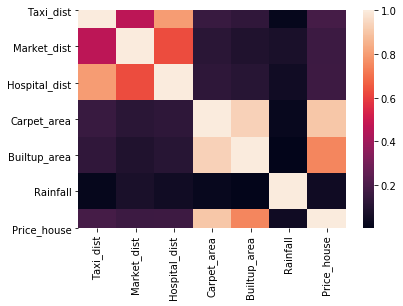

In [61]:
sns.heatmap(data.corr())

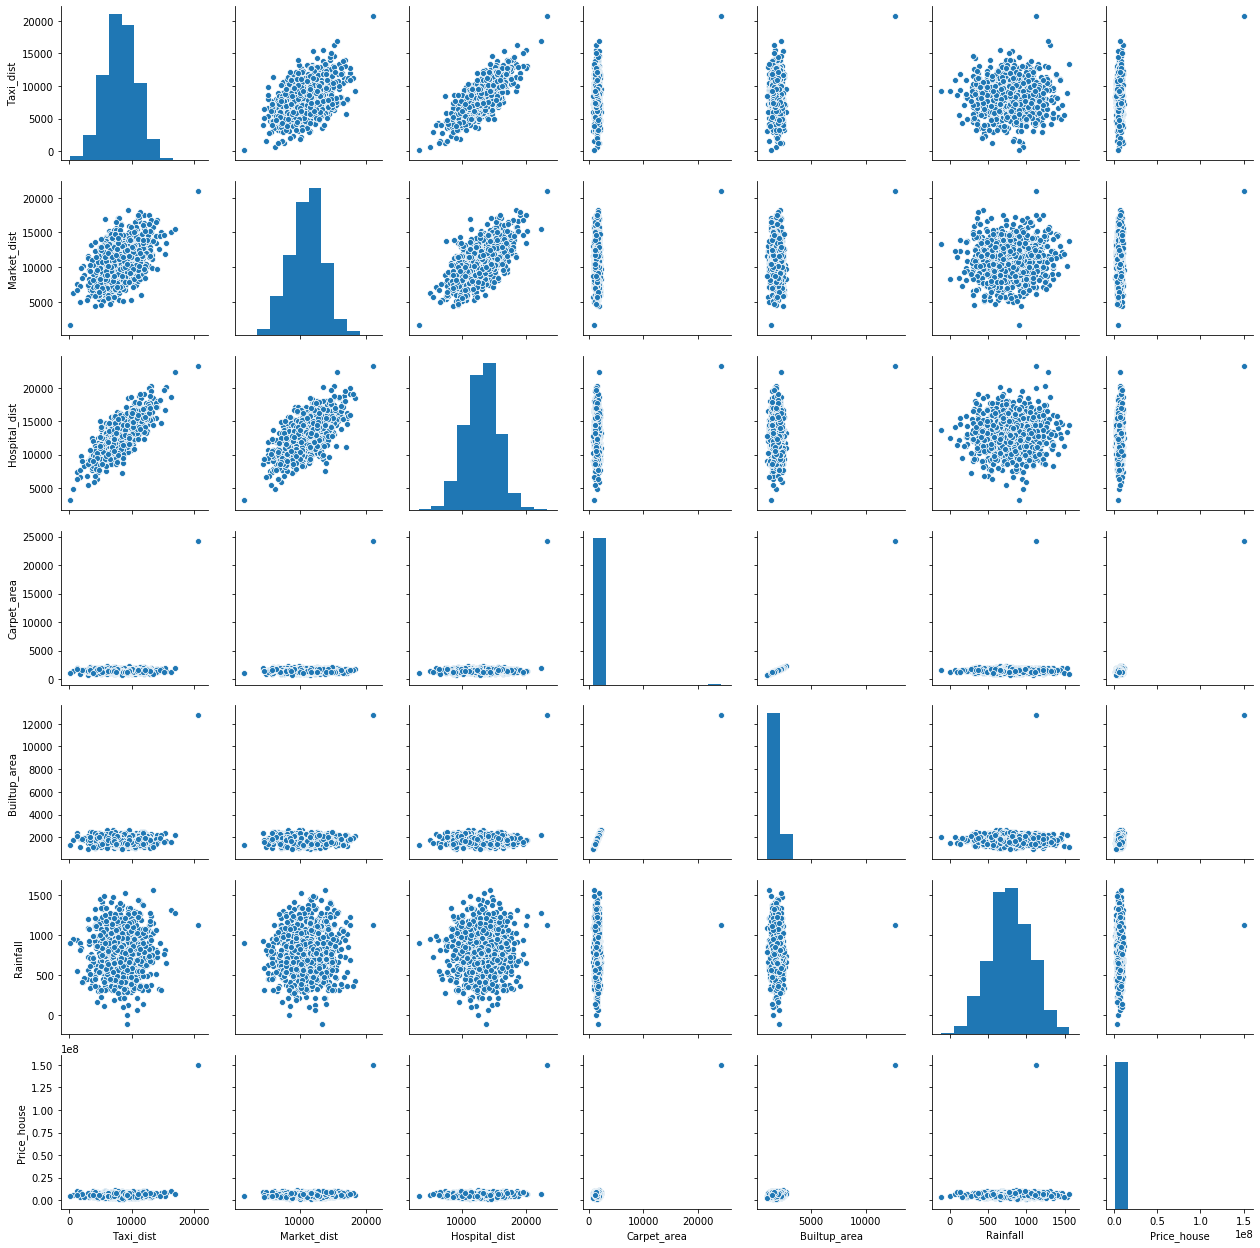

In [62]:
sns.pairplot(data)

# Outliers with Boxplot¶
Check outliers with boxplot

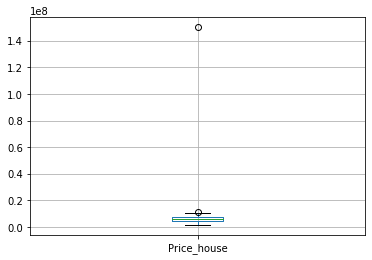

In [66]:
data.boxplot(column=["Price_house"])

In [67]:
# easy way to remove outliers
def sourav (data,age):
 Q1 = data[age].quantile(0.25)
 Q3 = data[age].quantile(0.75)
 IQR = Q3 - Q1
 data= data.loc[~((data[age] < (Q1 - 1.5 * IQR)) | (data[age] > (Q3 + 1.5 * IQR))),]
 return data

In [68]:
data = sourav(data,"Price_house")
data

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


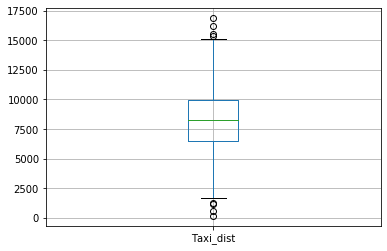

In [69]:
data.boxplot(column=["Taxi_dist"])

In [70]:
data = sourav(data,"Taxi_dist")

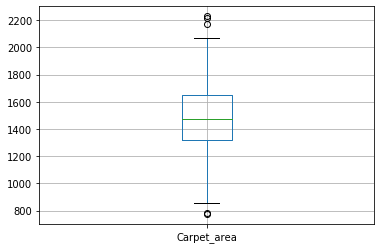

In [71]:
data.boxplot(column=["Carpet_area"])

In [72]:
data = sourav(data,"Carpet_area")

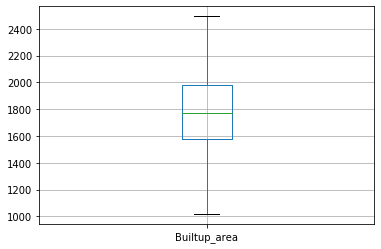

In [73]:
data.boxplot(column=["Builtup_area"])
data = sourav(data,"Builtup_area")

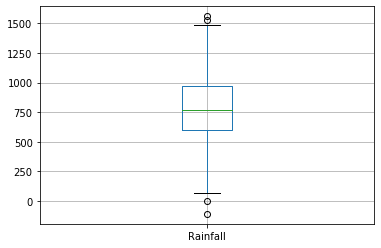

In [74]:
data.boxplot(column=["Rainfall"])
data = sourav(data,"Rainfall")

In [75]:
#segregating categorical variables
cat = data.loc[:,["City_type","Parking_type"]]
cat.head()


,City_type,Parking_type
0,CAT B,Open
1,CAT B,Not Provided
2,CAT A,Not Provided
3,CAT B,Covered
4,CAT B,Not Provided


In [76]:

#dropping the original variables
data = data.drop(["City_type","Parking_type"],axis=1)


In [77]:
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [78]:
# creating dummy varaibles
dum = pd.get_dummies(cat.astype(str),drop_first=True)
dum.head()

,City_type_CAT B,City_type_CAT C,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open
0,1,0,0,0,1
1,1,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,1,0


In [79]:
# concatnating the columns (cbind of R)
data = pd.concat([data,dum],axis=1)



In [80]:
rock=sm.ols(formula=
"Price_house~Taxi_dist+Market_dist+Hospital_dist+Carpet_area+Builtup_area + Rainfall+Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [49]:
# shows total summary
rock.summary()
#Prob (F-statistic) is the ANOVA; should be more than 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     78.31
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          8.18e-122
Time:                        13:29:22   Log-Likelihood:                -13554.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     867   BIC:                         2.719e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.591e+06   3.75e+05     14.908      0.000    4.85e+06    6.33e+06
Taxi_dist                         29.5284     27.128      1.088      0.277     -23.716      82.773
Market_dist                       11.3965     20.777      0.549      0.583     -29.383      52.176
Hospital_dist                     58.1930     30.056      1.936      0.053      -0.798     117.184
Carpet_area                      589.0032   3503.950      0.168      0.867   -6288.212    7466.219
Builtup_area                     146.3882   2924.742      0.050      0.960   -5594.014    5886.790
Rainfall                        -174.1455    156.946     -1.110      0.267    -482.183     133.892
Q('City_type_CAT B')           -1.857e+06    9.6e+04    -19.343      0.000   -2.05e+06   -1.67e+06
Q('City_type_CAT C')           -2.856e+06   1.06e+05    -26.900      0.000   -3.06e+06   -2.65e+06
Q('Parking_type_No Parking')   -6.572e+05   1.39e+05     -4.712      0.000   -9.31e+05   -3.83e+05
Q('Parking_type_Not Provided') -5.002e+05   1.23e+05     -4.054      0.000   -7.42e+05   -2.58e+05
Q('Parking_type_Open')         -2.816e+05   1.13e+05     -2.496      0.013   -5.03e+05   -6.02e+04
==============================================================================
Omnibus:                        4.924   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.796
Skew:                           0.159   Prob(JB):                       0.0909
Kurtosis:                       3.173   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
rock=sm.ols(formula=
"Price_house~Taxi_dist+Market_dist+Hospital_dist+Carpet_area+Rainfall+Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [85]:
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     86.24
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          8.59e-123
Time:                        18:37:31   Log-Likelihood:                -13554.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     868   BIC:                         2.718e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.591e+06   3.75e+05     14.925      0.000    4.86e+06    6.33e+06
Taxi_dist                         29.4861     27.099      1.088      0.277     -23.702      82.674
Market_dist                       11.3997     20.765      0.549      0.583     -29.356      52.156
Hospital_dist                     58.2262     30.031      1.939      0.053      -0.716     117.169
Carpet_area                      764.1769    169.192      4.517      0.000     432.104    1096.250
Rainfall                        -174.1267    156.855     -1.110      0.267    -481.986     133.733
Q('City_type_CAT B')           -1.857e+06    9.6e+04    -19.355      0.000   -2.05e+06   -1.67e+06
Q('City_type_CAT C')           -2.856e+06   1.06e+05    -26.919      0.000   -3.06e+06   -2.65e+06
Q('Parking_type_No Parking')   -6.573e+05   1.39e+05     -4.716      0.000   -9.31e+05   -3.84e+05
Q('Parking_type_Not Provided') -5.004e+05   1.23e+05     -4.060      0.000   -7.42e+05   -2.59e+05
Q('Parking_type_Open')         -2.815e+05   1.13e+05     -2.497      0.013   -5.03e+05   -6.03e+04
==============================================================================
Omnibus:                        4.921   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.793
Skew:                           0.159   Prob(JB):                       0.0910
Kurtosis:                       3.173   Cond. No.                     1.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
rock=sm.ols(formula=
"Price_house~Taxi_dist+Hospital_dist+Carpet_area+Rainfall+Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [87]:
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     95.87
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          9.89e-124
Time:                        18:41:38   Log-Likelihood:                -13555.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     869   BIC:                         2.718e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.627e+06   3.69e+05     15.260      0.000     4.9e+06    6.35e+06
Taxi_dist                         28.2756     26.999      1.047      0.295     -24.715      81.266
Hospital_dist                     66.0714     26.403      2.502      0.013      14.251     117.892
Carpet_area                      762.0518    169.080      4.507      0.000     430.199    1093.904
Rainfall                        -170.4158    156.646     -1.088      0.277    -477.865     137.034
Q('City_type_CAT B')           -1.861e+06   9.56e+04    -19.465      0.000   -2.05e+06   -1.67e+06
Q('City_type_CAT C')           -2.858e+06   1.06e+05    -26.959      0.000   -3.07e+06   -2.65e+06
Q('Parking_type_No Parking')    -6.59e+05   1.39e+05     -4.731      0.000   -9.32e+05   -3.86e+05
Q('Parking_type_Not Provided') -5.006e+05   1.23e+05     -4.063      0.000   -7.42e+05   -2.59e+05
Q('Parking_type_Open')         -2.822e+05   1.13e+05     -2.504      0.012   -5.03e+05    -6.1e+04
==============================================================================
Omnibus:                        4.879   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.750
Skew:                           0.158   Prob(JB):                       0.0930
Kurtosis:                       3.173   Cond. No.                     1.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
rock=sm.ols(formula=
"Price_house~Hospital_dist+Carpet_area+Rainfall+Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [89]:
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          1.59e-124
Time:                        18:42:57   Log-Likelihood:                -13555.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     870   BIC:                         2.717e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.579e+06   3.66e+05     15.248      0.000    4.86e+06     6.3e+06
Hospital_dist                     87.6294     16.535      5.300      0.000      55.177     120.082
Carpet_area                      762.1568    169.089      4.507      0.000     430.287    1094.027
Rainfall                        -178.3716    156.471     -1.140      0.255    -485.476     128.733
Q('City_type_CAT B')           -1.859e+06   9.56e+04    -19.445      0.000   -2.05e+06   -1.67e+06
Q('City_type_CAT C')           -2.854e+06   1.06e+05    -26.937      0.000   -3.06e+06   -2.65e+06
Q('Parking_type_No Parking')   -6.576e+05   1.39e+05     -4.721      0.000   -9.31e+05   -3.84e+05
Q('Parking_type_Not Provided') -4.955e+05   1.23e+05     -4.024      0.000   -7.37e+05   -2.54e+05
Q('Parking_type_Open')         -2.795e+05   1.13e+05     -2.481      0.013   -5.01e+05   -5.84e+04
==============================================================================
Omnibus:                        5.342   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.210
Skew:                           0.169   Prob(JB):                       0.0739
Kurtosis:                       3.166   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
rock=sm.ols(formula=
"Price_house~Hospital_dist+Carpet_area+Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [91]:
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     122.9
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          2.63e-125
Time:                        18:44:06   Log-Likelihood:                -13556.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     871   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       5.436e+06   3.44e+05     15.810      0.000    4.76e+06    6.11e+06
Hospital_dist                     86.7472     16.520      5.251      0.000      54.324     119.170
Carpet_area                      769.4710    168.996      4.553      0.000     437.783    1101.159
Q('City_type_CAT B')           -1.857e+06   9.56e+04    -19.424      0.000   -2.04e+06   -1.67e+06
Q('City_type_CAT C')           -2.851e+06   1.06e+05    -26.912      0.000   -3.06e+06   -2.64e+06
Q('Parking_type_No Parking')   -6.491e+05   1.39e+05     -4.666      0.000   -9.22e+05   -3.76e+05
Q('Parking_type_Not Provided') -4.916e+05   1.23e+05     -3.994      0.000   -7.33e+05    -2.5e+05
Q('Parking_type_Open')           -2.8e+05   1.13e+05     -2.485      0.013   -5.01e+05   -5.88e+04
==============================================================================
Omnibus:                        5.544   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.416
Skew:                           0.173   Prob(JB):                       0.0667
Kurtosis:                       3.168   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#predicting the outcomes
data["pred"] = rock.predict()
data.head()


,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house,City_type_CAT B,City_type_CAT C,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open,pred
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,1,0,0,0,1,5.504408e+06
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,1,0,0,1,0,5.313141e+06
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,0,0,0,1,0,7.449713e+06
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,1,0,0,0,0,5.761921e+06
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,1,0,0,1,0,5.657346e+06


In [94]:
# shows p value
var = pd.DataFrame(round(rock.pvalues,3))

In [95]:
var

,0
Intercept,0.000
Hospital_dist,0.000
Carpet_area,0.000
Q('City_type_CAT B'),0.000
Q('City_type_CAT C'),0.000
Q('Parking_type_No Parking'),0.000
Q('Parking_type_Not Provided'),0.000
Q('Parking_type_Open'),0.013


In [97]:
#coefficients
var["coeff"] = rock.params

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = rock.model.exog #.if I had saved data as rock
# this it would have looked like rock.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
var["vif"] = vif
var

,0,coeff,vif
Intercept,0.000,5.436308e+06,70.787739
Hospital_dist,0.000,8.674718e+01,1.014751
Carpet_area,0.000,7.694710e+02,1.009040
Q('City_type_CAT B'),0.000,-1.856926e+06,1.299245
Q('City_type_CAT C'),0.000,-2.850954e+06,1.287127
Q('Parking_type_No Parking'),0.000,-6.490630e+05,1.515305
Q('Parking_type_Not Provided'),0.000,-4.916076e+05,1.707268
Q('Parking_type_Open'),0.013,-2.799826e+05,1.814696


In [99]:
###### mape
data["mp"] = abs((data["Price_house"] - data["pred"])/data["Price_house"])
(data.mp.mean())*100#mape

18.58300674683992

In [100]:
# assumption normality test
#Shapiro Wilk test
#Null Hypothesis: The residuals are normally distributed.
#Alternative Hypothesis: The residuals are not normally distributed.
from scipy import stats
stats.shapiro(rock.resid)#2nd value is p value;

(0.9974417686462402, 0.18696172535419464)

In [101]:
from scipy.stats import normaltest
normaltest(rock.resid)

NormaltestResult(statistic=5.544011739436491, pvalue=0.06253643890081702)

In [102]:
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(rock.resid , lags = 1)#2nd value is p value; 


C:\Users\Sourav Chowdhury\Anaconda34\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([2.16843498]), array([0.14086953]))

In [103]:
#Checking heteroscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [104]:
#Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(rock.resid, rock.model.exog)
lzip(name, test)#2nd value is p value; 

[('F statistic', 1.0577509092240607), ('p-value', 0.28001263425553935)]

In [ ]:
#Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(rock.resid, rock.model.exog)
lzip(name, test)